# Statistical Thinking in Python

---
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
---

## Part 1

---

### Chapter 1: Graphical EDA

* Always label the axes!
* Histograms
  * A rule of thumb for number of bins is the square root of the number of observations
* Bee swarm plots
* Empirical cumulative distribution function (ECDF)
  * Sorted and plotted as a series of points to show how the data is distributed

In [27]:
from sklearn.datasets import load_iris

# data, target = load_iris(return_X_y=True, as_frame=True)
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
datapath = "datasets/iris.data"
iris = pd.read_csv(datapath, header=None, names=data.feature_names + ["species"])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [42]:
versicolor_petal_length = iris[iris["species"] == "Iris-versicolor"]["petal length (cm)"].copy().reset_index(drop=True)
versicolor_petal_length[:10]

0    4.7
1    4.5
2    4.9
3    4.0
4    4.6
5    4.5
6    4.7
7    3.3
8    4.6
9    3.9
Name: petal length (cm), dtype: float64

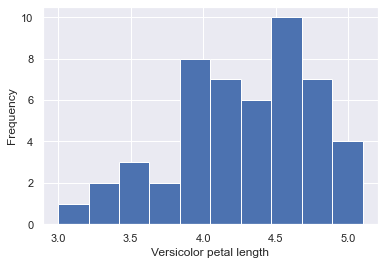

In [35]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel("Versicolor petal length")
plt.ylabel("Frequency")

# Show histogram
plt.show();

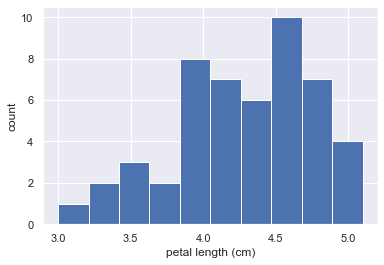

In [36]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("count")

# Show histogram
plt.show()

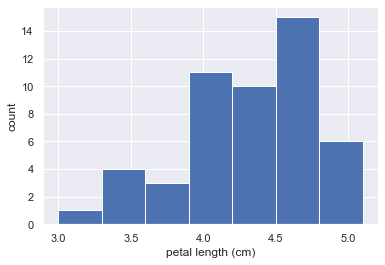

In [37]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

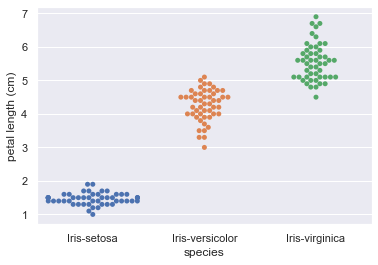

In [38]:
# Make copy of df to match name
df = iris.copy()

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x="species", y="petal length (cm)", data=df)

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()

In [39]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

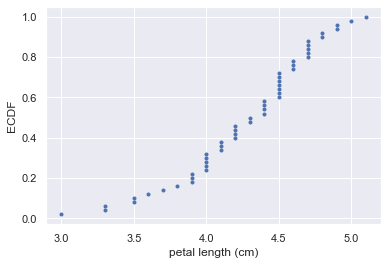

In [40]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("ECDF")

# Display the plot
plt.show()

In [43]:
# Get other petal lengths data
setosa_petal_length = iris[iris["species"] == "Iris-setosa"]["petal length (cm)"].copy().reset_index(drop=True)
virginica_petal_length = iris[iris["species"] == "Iris-virginica"]["petal length (cm)"].copy().reset_index(drop=True)

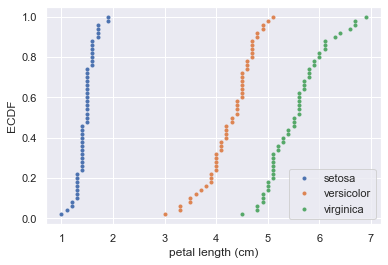

In [44]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

---

### Chapter 2: Quantitative EDA

* Mean and median
* Percentiles, outliers and box plots
  * Box is the middle 50% of data, or the IQR (Interquartile range)
  * Whiskers typically extend 1.5 IQR past interquartile range (1.5 above 75% and below 25%)
* Variance and standard deviation
  * Calculate variance and stdev by hand, plus with numpy
* Covariance and the Pearson correlation coefficient
  * Covariance is the distance of a point from the mean of two separate groups
  * Pearson correlation coeffition is covariance divided by stdev of x and y
  * Or, it is the variability due to codependence divided by the independent variability

In [45]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [46]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


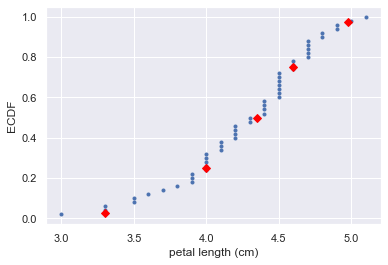

In [47]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle="none")

# Show the plot
plt.show()

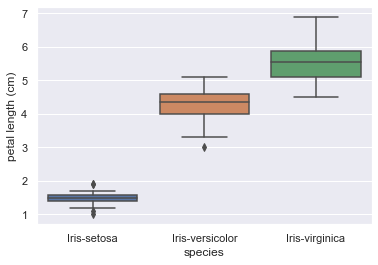

In [48]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x="species", y="petal length (cm)", data=df)

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()

In [49]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [50]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


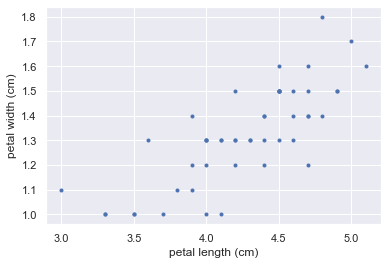

In [52]:
# Get vers petal width
versicolor_petal_width = iris[iris["species"] == "Iris-versicolor"]["petal width (cm)"].copy().reset_index(drop=True)

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("petal width (cm)")

# Show the result
plt.show()

In [53]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0][1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [54]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


---

### Chapter 3: Probabilistic Thinking - Discrete Variables

* Probabilistic logic and statistical inference
* Random number generators and hacker statistics
  * Hacker statistics
    * Use simulated repeated measurements to compute probabilities
    * Simulate coin flips (Bernoulli trial - 0/1 true/false)
  * Hacker stats probabilities
    * Determine how to simulate data
    * Simulate many many times
    * Probability is approximately the fraction of trials with the outcome of interest
  * Bernoulli trials
* The Binomial distribution
  * Probability mass function (PMF): a set of probabilities of discrete outcomes
* Poisson processes and the Poisson distribution
  * Poisson process: timing of next event is independent of when previous event happened
  * Poisson distribution
  * With rare events (low p, high n) the Binomial distribution is Poisson

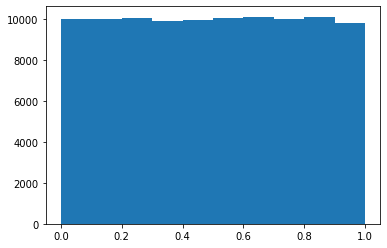

In [3]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

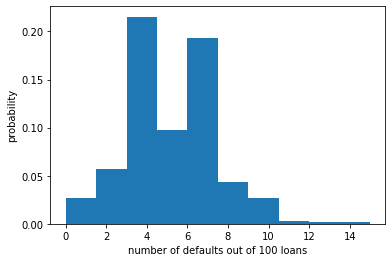

In [6]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(len(n_defaults)):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

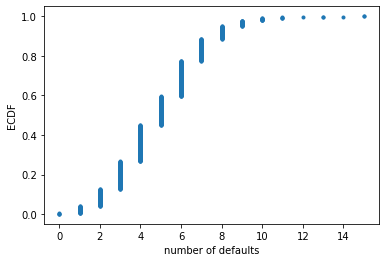

Probability of losing money = 0.022


In [8]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("number of defaults")
plt.ylabel("ECDF")

# Show the plot
plt.show();

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

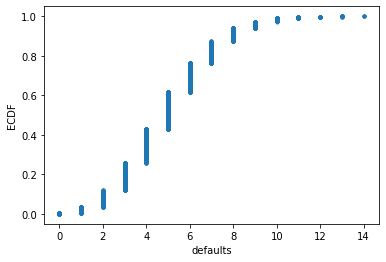

In [9]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("defaults")
plt.ylabel("ECDF")

# Show the plot
plt.show();

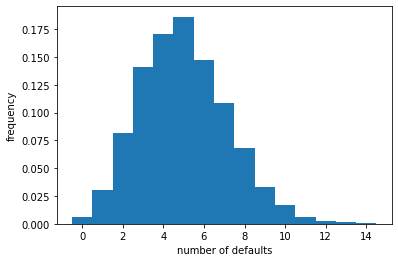

In [11]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, density=True)

# Label axes
plt.xlabel("number of defaults")
plt.ylabel("frequency")

# Show the plot
plt.show();

##### Poisson Process and Distribution

In [12]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


In [13]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


---

### Chapter 4: Probabilistic Thinking - Continuous Variables

* Probability density functions
  * Continuous analog to the probability mass function (PMF)
* The Normal Distribution

Normal Distribution

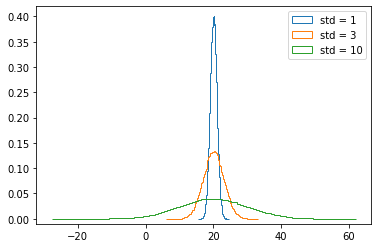

In [71]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype="step")
_ = plt.hist(samples_std3, bins=100, density=True, histtype="step")
_ = plt.hist(samples_std10, bins=100, density=True, histtype="step")

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [72]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

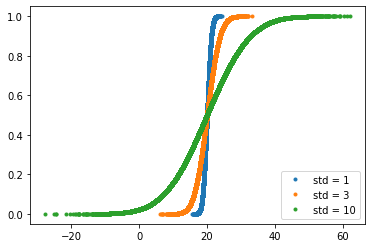

In [73]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker=".", linestyle="none")
_ = plt.plot(x_std3, y_std3, marker=".", linestyle="none")
_ = plt.plot(x_std10, y_std10, marker=".", linestyle="none")

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

Belmont horse racing times

In [93]:
datapath = "assets/data/belmont.csv"
belmont_raw = pd.read_csv(datapath)
print(belmont_raw.shape)
belmont_raw.head()

(91, 8)


,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [94]:
belmont_time = belmont_raw["Time"].str.split(":", expand=True)
belmont_time["mins"] = belmont_time[0].astype(int) * 60 + belmont_time[1].astype(float)
belmont_raw["Time"] = belmont_time["mins"]
belmont_raw.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,148.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",146.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,148.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,150.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,150.42,Belmont,1.5


In [95]:
belmont = belmont_raw.copy()

In [97]:
belmont_no_outliers = belmont[(belmont["Year"] != 1970) | (belmont["Year"] != 1973)]
belmont_no_outliers.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,148.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",146.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,148.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,150.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,150.42,Belmont,1.5


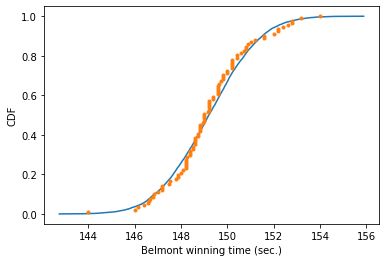

In [99]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers["Time"].mean()
sigma = belmont_no_outliers["Time"].std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers["Time"])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [103]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.001655


##### The Exponential Distribution

The waiting times between arrivals of a Poisson process is exponentially distributed.

> What about two different Poisson processes?

Total waiting time is the sum of the times waited for each.

In [104]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

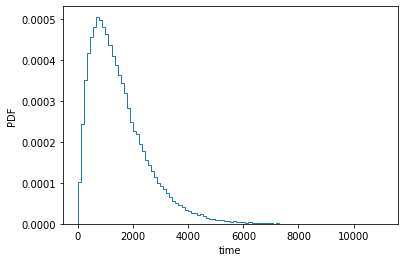

In [105]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype="step")

# Label axes
_ = plt.xlabel("time")
_ = plt.ylabel("PDF")

# Show the plot
plt.show()

---
---

## Part 2